In [3]:
import numpy as np
import pandas as pd
import statsmodels as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

#过采样算法
from imblearn.combine import SMOTEENN
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import SMOTE, ADASYN

#模型验证
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss,balanced_accuracy_score
from sklearn.model_selection import train_test_split

import toad
from toad.plot import bin_plot
import pickle
from sklearn.model_selection  import cross_val_score

In [4]:
data=pd.read_excel('C:\\Users\\Administrator\\Desktop\\thesis_shit\\finaldata171819.xlsx')

In [5]:
colname=['code','name','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12',
         'x13','x14','x15','x16','x17','x18','x19','x20','x21','x22','x23','x24','x25','x26','x27','x28','x29','x30','x31','x32','y']
data.columns=colname
data=data.drop(['code','name'],axis=1)

In [6]:
y=data.iloc[:,-1]
X=data.iloc[:,:-1]

In [7]:
y.value_counts()

0    2093
1     182
Name: y, dtype: int64

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
data_0=data[data.y==0]
data_1=data[data.y==1]
train_0,test_0=train_test_split(data_0,test_size=0.15,random_state=19)
train_1,test_1=train_test_split(data_1,test_size=0.15,random_state=19)

train0,eva0=train_test_split(train_0,test_size=0.15,random_state=19)
train1,eva1=train_test_split(train_1,test_size=0.15,random_state=19)

train=pd.concat([train0,train1])
eva=pd.concat([eva0,eva1])
test=pd.concat([test_0,test_1])

In [9]:
Xtrain=train.iloc[:,:-1]
ytrain=train.iloc[:,-1]
Xeva=eva.iloc[:,:-1]
yeva=eva.iloc[:,-1]
Xtest=test.iloc[:,:-1]
ytest=test.iloc[:,-1]

In [10]:
from imblearn.over_sampling import SMOTE
#过采样，好坏客户平分
sm = SMOTE(random_state=19,sampling_strategy=0.4)
#sm = SMOTE(random_state=42,sampling_strategy="auto")
#sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(Xtrain, ytrain)
print(y_resampled.value_counts())

0    1512
1     604
Name: y, dtype: int64


In [11]:
print(ytrain.value_counts())
print(y_resampled.value_counts())
print(yeva.value_counts())
print(ytest.value_counts())

0    1512
1     130
Name: y, dtype: int64
0    1512
1     604
Name: y, dtype: int64
0    267
1     24
Name: y, dtype: int64
0    314
1     28
Name: y, dtype: int64


In [12]:
def drop_corr(X):
    X=X.drop(['x3','x31','x8','x9','x27','x17'],axis=1)
    return X
ytrain=y_resampled
Xtrain=drop_corr(X_resampled)
Xeva=drop_corr(Xeva)

In [13]:
"""
def take_X(X):
    X=X[['x5','x6','x13','x19','x23','x25','x26','x33']]
    return X
Xtrain=take_X(X_resampled)
Xeva=take_X(Xeva)
data1=data[['x4','x6','x12','x13','x16','x19','x23','x24','x33','y']]
"""


"\ndef take_X(X):\n    X=X[['x5','x6','x13','x19','x23','x25','x26','x33']]\n    return X\nXtrain=take_X(X_resampled)\nXeva=take_X(Xeva)\ndata1=data[['x4','x6','x12','x13','x16','x19','x23','x24','x33','y']]\n"

In [14]:
data1=data[['x4','x6','x11','x12','x15','x18','x22','x23','x32','y']]

---------------------------------------LR--------------------------------------------------------

In [16]:
train=pd.concat([Xtrain,ytrain],axis=1)
eva=pd.concat([Xeva,yeva],axis=1)
test=pd.concat([Xtest,ytest],axis=1)
alll=pd.concat([train,eva,test],axis=0)

In [17]:
X=train
X1=X[['x4','x6','x15','y']]
combiner1 = toad.transform.Combiner()
combiner1.fit(X1,X1['y'],method='dt',n_bins=4)
#导出箱的节点
bins1 = combiner1.export()
#根据节点实施分箱
dev_slct1 = combiner1.transform(X1)

<AxesSubplot:xlabel='x15', ylabel='prop'>

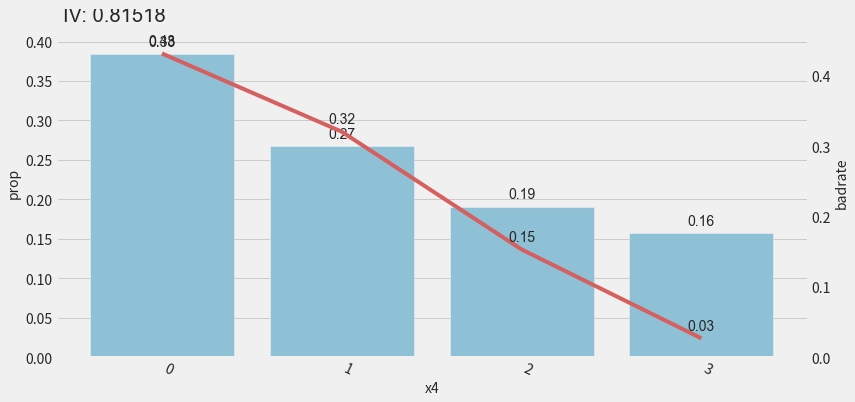

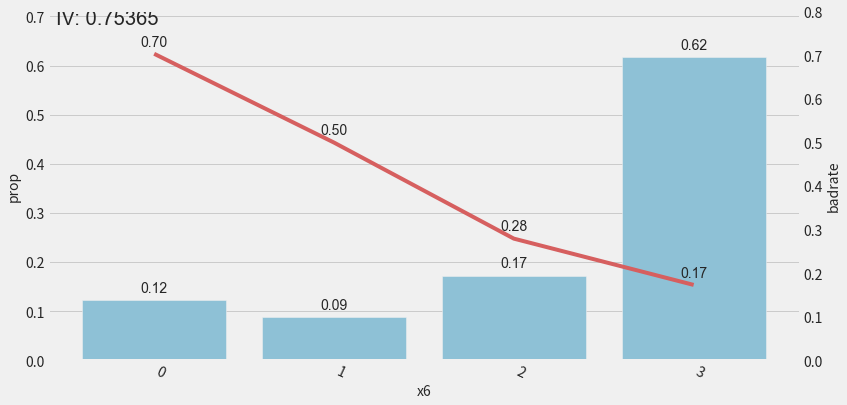

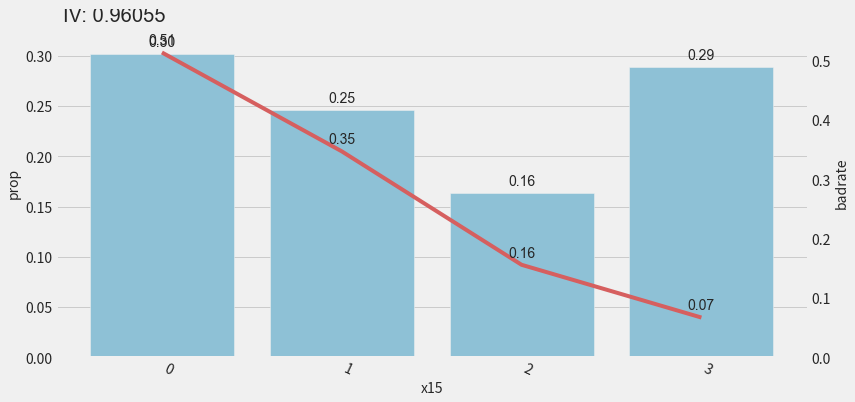

In [18]:
from toad.plot import  bin_plot,badrate_plot
bin_plot(dev_slct1,x='x4',target='y')
bin_plot(dev_slct1,x='x6',target='y')
bin_plot(dev_slct1,x='x15',target='y')

<AxesSubplot:xlabel='x23', ylabel='prop'>

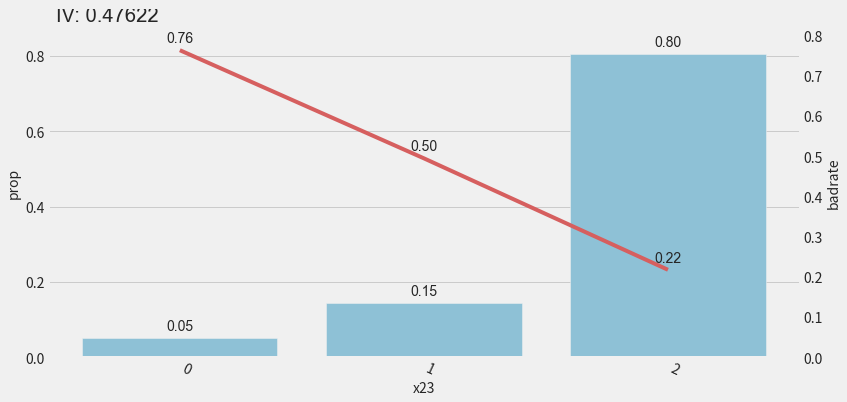

In [19]:
X2=X[['x23','y']]
combiner2 = toad.transform.Combiner()
combiner2.fit(X2,X2['y'],method='dt',n_bins=3)

bins2 = combiner2.export()

dev_slct2 = combiner2.transform(X2)

bin_plot(dev_slct2,x='x23',target='y')

<AxesSubplot:xlabel='x25', ylabel='prop'>

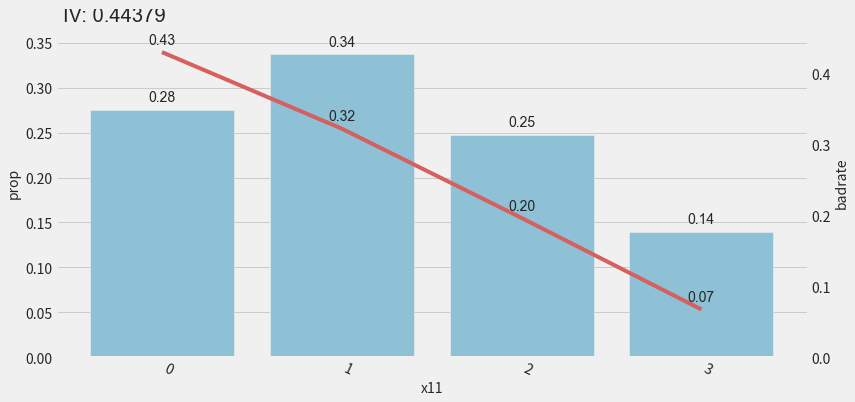

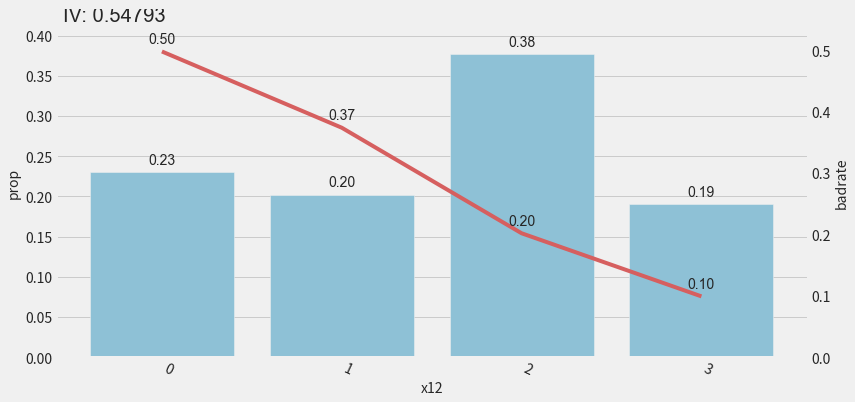

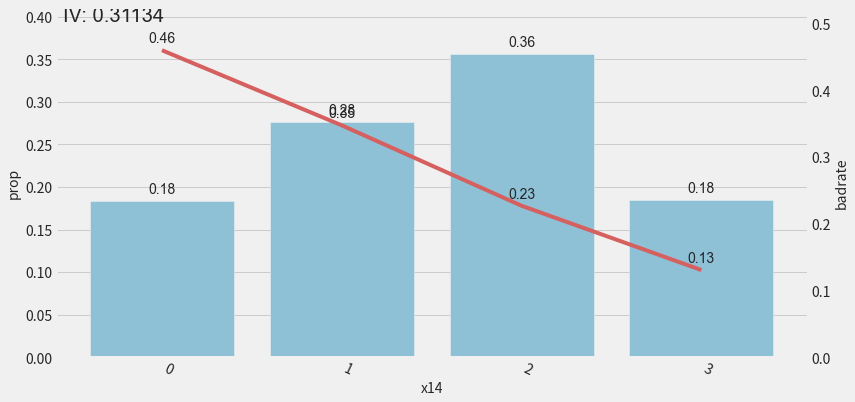

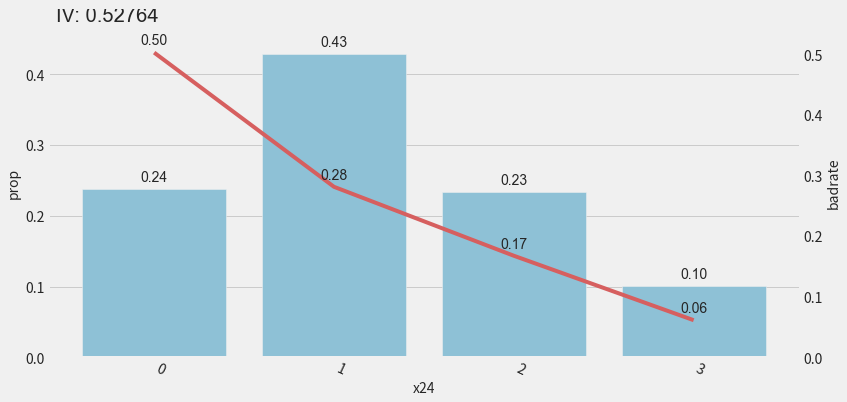

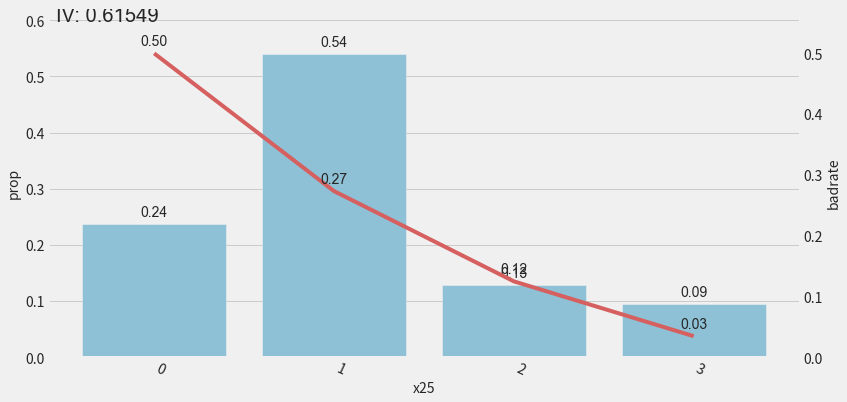

In [20]:
X3=X[['x11','x12','x14','x24','x25','y']]
combiner3 = toad.transform.Combiner()
combiner3.fit(X3,X3['y'],method='chi',n_bins=4)

bins3 = combiner3.export()

dev_slct3 = combiner3.transform(X3)

bin_plot(dev_slct3,x='x11',target='y')
bin_plot(dev_slct3,x='x12',target='y')
bin_plot(dev_slct3,x='x14',target='y')
bin_plot(dev_slct3,x='x24',target='y')
bin_plot(dev_slct3,x='x25',target='y')

In [21]:
def bin(X,XX):
    X1=X[['x4','x6','x15','y']]
    XX1=XX[['x4','x6','x15','y']]
    combiner1 = toad.transform.Combiner()
    combiner1.fit(X1,X1['y'],method='dt',n_bins=4)
    
    bins1 = combiner1.export()
    
    dev_slct1 = combiner1.transform(X1)
    dev_slct11 = combiner1.transform(XX1)
    transer = toad.transform.WOETransformer()
    
    woe1=transer.fit_transform(dev_slct1,dev_slct1['y'],exclude =["y"])
    woe11=transer.fit_transform(dev_slct11,dev_slct11['y'],exclude =["y"])
    
    X2=X[['x23','y']]
    XX2=XX[['x23','y']]
    combiner2 = toad.transform.Combiner()
    combiner2.fit(X2,X2['y'],method='dt',n_bins=3)
    
    bins2 = combiner2.export()
    
    dev_slct2 = combiner2.transform(X2)
    dev_slct22 = combiner2.transform(XX2)
    transer = toad.transform.WOETransformer()
    
    woe2=transer.fit_transform(dev_slct2,dev_slct2['y'],exclude =["y"])
    woe22=transer.fit_transform(dev_slct22,dev_slct22['y'],exclude =["y"])
    
    X3=X[['x11','x12','x14','x24','x25','y']]
    XX3=XX[['x11','x12','x14','x24','x25','y']]
    combiner3 = toad.transform.Combiner()
    combiner3.fit(X3,X3['y'],method='chi',n_bins=4)
    
    bins3 = combiner3.export()
    
    dev_slct3 = combiner3.transform(X3)
    dev_slct33 = combiner3.transform(XX3)
    transer = toad.transform.WOETransformer()
    
    woe3=transer.fit_transform(dev_slct3,dev_slct3['y'],exclude =["y"])
    woe33=transer.fit_transform(dev_slct33,dev_slct33['y'],exclude =["y"])
    
    train_bin=pd.concat([woe1[['x4','x6','x15']],woe2[['x23']],woe3],axis=1)
    eva_bin=pd.concat([woe11[['x4','x6','x15']],woe22[['x23']],woe33],axis=1)
    
    return train_bin,eva_bin,bins1,bins2,bins3

In [22]:
train_bin,eva_bin,bins1,bins2,bins3=bin(train,eva)

In [23]:
train_bin,test_bin,bins1,bins2,bins3=bin(train,test)

In [24]:
set(train_bin['x14'])

{-0.9765601158514611,
 -0.3071925324241147,
 0.28802096271974975,
 0.7578926339279496}

In [25]:
print(bins1)
print(bins2)
print(bins3)

{'x4': [4.75558614730835, 9.083593368530273, 15.501879692077637], 'x6': [80.18615341186523, 92.82870483398438, 98.58089447021484], 'x15': [0.8121179342269897, 1.1580326557159424, 1.4765000343322754], 'y': [0.5]}
{'x23': [-428.1723327636719, -43.1600399017334], 'y': [0.5]}
{'x11': [2.6765, 11.1634, 42.1806], 'x12': [-0.223276979657852, 2.76937609910407, 15.4507860572048], 'x14': [2.2089, 3.9148, 9.4895], 'x24': [-0.079924365159657, 6.5096525397705, 13.016899843618], 'x25': [-0.004, 0.72, 1.2397], 'y': [1]}


In [26]:
train_bin.y.value_counts()
print(train_bin.shape)

(2116, 10)


In [27]:
train[['x4','x6','x15','x23','x11','x12','x14','x24','x25']].head()

,x4,x6,x15,x23,x11,x12,x14,x24,x25
0,22.3819,100.001392,2.1116,67.369285,12.0888,5.685765,4.1184,7.425413,0.4300
1,16.1695,100.010080,1.0885,155.505101,36.6049,21.733826,3.3746,10.273560,0.9031
2,7.2433,101.313084,1.0724,220.059130,5.3762,6.595372,4.7408,9.211992,1.0119
3,3.6485,100.432096,0.6856,-316.302710,1.9894,-2.738562,2.7470,-4.369473,-1.0951
4,2.0289,93.547404,0.8325,-48.029546,1.2529,-0.140826,2.5304,-0.187986,-0.0110


In [28]:
train_bin.head()

,x4,x6,x15,x23,x11,x12,x14,x24,x25,y
0,-2.665905,-0.645641,-1.714450,-0.36062,-0.490289,-0.456180,-0.307193,-0.684568,-0.059603,0
1,-2.665905,-0.645641,0.287166,-0.36062,-0.490289,-1.287909,0.288021,-0.684568,-1.028296,0
2,0.168378,-0.645641,0.287166,-0.36062,0.175677,-0.456180,-0.307193,-0.684568,-1.028296,0
3,0.645003,-0.645641,0.974056,0.89807,0.637932,0.909418,0.288021,0.929543,0.917614,0
4,0.645003,-0.029567,0.287166,0.89807,0.637932,0.401801,0.288021,0.929543,0.917614,0


In [29]:
Xtrain_bin=train_bin.iloc[:,:-1]
ytrain=train_bin.iloc[:,-1]
Xeva_bin=eva_bin.iloc[:,:-1]
yeva=eva_bin.iloc[:,-1]

In [30]:
Xtest_bin=test_bin.iloc[:,:-1]
ytest=test_bin.iloc[:,-1]

In [31]:
lr = LogisticRegression(solver='liblinear')
lr.fit(Xtrain_bin, ytrain)
y_pred = lr.predict(Xeva_bin)

y_true =yeva
 
accuracyScore = accuracy_score(y_true, y_pred)
print('eva accuracy is:',accuracyScore)
 

precision=precision_score(y_true, y_pred)
print('eva precision is:',precision)
 

sensitivity=recall_score(y_true, y_pred)
print('eva sensitivity is:',sensitivity)
  

f1Score=f1_score(y_true, y_pred)
print("f1_score:",f1Score)


eva accuracy is: 0.9037800687285223
eva precision is: 0.4411764705882353
eva sensitivity is: 0.625
f1_score: 0.5172413793103449


In [76]:
lr_param={'C':[0.01,0.1,0.2,0.5,1,1.5,2],
          'class_weight':[{1:1,0:1},{1:2,0:1},{1:3,0:1}],    
}
lr_gsearch=GridSearchCV(estimator=LogisticRegression(random_state=19,fit_intercept=True,penalty='l2',solver='liblinear'),
                                                    param_grid=lr_param,cv=3,scoring='f1',n_jobs=-1,verbose=2)
lr_gsearch.fit(Xtrain_bin,ytrain)
print(lr_gsearch.best_params_)
y_pred=lr_gsearch.best_estimator_.predict(Xeva_bin)

#测试数据集
print("accuracy on evaluation set:{:.3f}".format(lr_gsearch.best_estimator_.score(Xeva_bin, yeva)))
 
y_true =yeva
 
accuracyScore = accuracy_score(y_true, y_pred)
print('eva accuracy is:',accuracyScore)
 
#precision,TP/(TP+FP) （真阳性）/（真阳性+假阳性）
precision=precision_score(y_true, y_pred)
print('eva precision is:',precision)
 
#recall（sensitive）敏感度，(TP)/（TP+FN）
sensitivity=recall_score(y_true, y_pred)
print('eva sensitivity is:',sensitivity)
  
#F1 = 2 x (精确率 x 召回率) / (精确率 + 召回率)
#F1 分数会同时考虑精确率和召回率，以便计算新的分数。可将 F1 分数理解为精确率和召回率的加权平均值，其中 F1 分数的最佳值为 1、最差值为 0：
f1Score=f1_score(y_true, y_pred)
print("f1_score:",f1Score)

Fitting 3 folds for each of 21 candidates, totalling 63 fits
{'C': 0.01, 'class_weight': {1: 2, 0: 1}}
accuracy on evaluation set:0.797
eva accuracy is: 0.7972508591065293
eva precision is: 0.26666666666666666
eva sensitivity is: 0.8333333333333334
f1_score: 0.40404040404040403


In [66]:
"""默认参数
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)"""

"默认参数\nLogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,\n                   intercept_scaling=1, l1_ratio=None, max_iter=100,\n                   multi_class='warn', n_jobs=None, penalty='l2',\n                   random_state=None, solver='warn', tol=0.0001, verbose=0,\n                   warm_start=False)"

In [52]:
fpr,tpr,thresholds=roc_curve(yeva,y_pred)
roc_auc=auc(fpr,tpr)
ks=max(tpr-fpr)
ar=2*roc_auc-1
gini=ar
print('ks is',ks)
print('gini is',gini)

ks is 0.5538389513108615
gini is 0.5538389513108615


0.5381909547738694
0.9106529209621993
0.5357142857142857
0.46875
0.625
0.5613295880149812


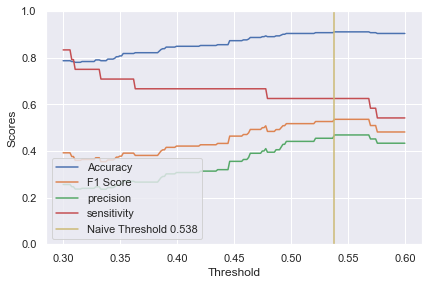

In [77]:
#change the threshold
lr = LogisticRegression(solver='liblinear')
lr.fit(Xtrain_bin, ytrain.values.ravel())
proba_pred=lr.predict_proba(Xeva_bin)
y_pred=lr.predict(Xeva_bin)
y_true =yeva

num_thresholds=200
accuracy_score_threshold=np.zeros((num_thresholds,))
f1_score_threshold=np.zeros((num_thresholds,))
precision_threshold=np.zeros((num_thresholds,))
sensitivity_threshold=np.zeros((num_thresholds,))
ks_threshold=np.zeros((num_thresholds,))
## Start Coding Here ##

# Generate a grid of thresholds between 0.3 and 0.6
threshold_range=np.linspace(0.3,0.6,num_thresholds)

# Compute the test scores for all thresholds
for i in range(num_thresholds): 
    Y_pred=proba_pred[:,1]>threshold_range[i]  
    accuracy_score_threshold[i]=accuracy_score(yeva,Y_pred)
    f1_score_threshold[i]=f1_score(yeva,Y_pred)
    precision_threshold[i]=precision_score(y_true, Y_pred)
    sensitivity_threshold[i]=recall_score(y_true, Y_pred)
    fpr,tpr,thresholds=roc_curve(yeva,Y_pred)
    roc_auc=auc(fpr,tpr)
    ks_threshold[i]=max(tpr-fpr)
    
index=np.argmax(f1_score_threshold)
best_threshold=threshold_range[index]

print(best_threshold)
print(accuracy_score_threshold[index])
print(f1_score_threshold[index])
print(precision_threshold[index])
print(sensitivity_threshold[index])
print(ks_threshold[index])

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(
    threshold_range,
    accuracy_score_threshold,
    label='Accuracy'
)

ax.plot(
    threshold_range,
    f1_score_threshold,
    label='F1 Score'
)

ax.plot(
    threshold_range,
    precision_threshold,
    label='precision'
)

ax.plot(
    threshold_range,
    sensitivity_threshold,
    label='sensitivity'
)


plt.axvline(x = best_threshold, color = 'y', label =  f'Naive Threshold {round(best_threshold,3)}')

ax.set_ylim((0.0, 1))
ax.set_xlabel("Threshold")
ax.set_ylabel("Scores")

leg = ax.legend(loc="lower left", fancybox=True)

---------lift-----

In [89]:
lr = LogisticRegression(solver='liblinear')
lr.fit(Xtrain_bin, ytrain.values.ravel())
proba_pred=lr.predict_proba(Xeva_bin)
y_pred=lr.predict(Xeva_bin)
y_true =yeva

In [93]:
lr = LogisticRegression(solver='liblinear',C= 0.5, class_weight= {1: 2, 0: 1})
lr.fit(Xtrain_bin, ytrain.values.ravel())
proba_pred=lr.predict_proba(Xtest_bin)
y_pred=lr.predict(Xtest_bin)
y_true =ytest

In [94]:
#得分公式
'''
P0 = 50
PDO = 10
theta0 = 1.0/20
B = PDO/np.log(2)
A = P0 + B*np.log(theta0)
'''
def Score(probability):

    score = A-B*np.log(probability/(1-probability))
    return score

def List_score(pos_probablity_list):
    list_score=[]
    for probability in pos_probablity_list:
        score=Score(probability)
        list_score.append(score)
    return list_score

P0 = 600
PDO = 20
theta0 = 1.0/60
B = PDO/np.log(2)
A = P0 + B*np.log(theta0)
print("A:",A)
print("B:",B)
#print("test ok")

list_coef = list(lr.coef_[0])
intercept= lr.intercept_

probablity_list=lr.predict_proba(Xtest_bin)

pos_probablity_list=[i[1] for i in probablity_list]

list_score=List_score(pos_probablity_list)
list_predict=lr.predict(Xtest_bin)
df_result_test=pd.DataFrame({"label":ytest,"predict":list_predict,"pos_probablity":pos_probablity_list,"score":list_score})

df_result_test.to_excel("C:\\Users\\Administrator\\Desktop\\score_proba_test.xlsx")

A: 481.8621880878296
B: 28.85390081777927


In [95]:
#得分公式
'''
P0 = 50
PDO = 10
theta0 = 1.0/20
B = PDO/np.log(2)
A = P0 + B*np.log(theta0)
'''
def Score(probability):
    score = A-B*np.log(probability/(1-probability))
    return score

def List_score(pos_probablity_list):
    list_score=[]
    for probability in pos_probablity_list:
        score=Score(probability)
        list_score.append(score)
    return list_score

P0 = 600
PDO = 20
theta0 = 1.0/60
B = PDO/np.log(2)
A = P0 + B*np.log(theta0)
print("A:",A)
print("B:",B)
#print("test ok")

list_coef = list(lr.coef_[0])
intercept= lr.intercept_


probablity_list=lr.predict_proba(Xeva_bin)

pos_probablity_list=[i[1] for i in probablity_list]

list_score=List_score(pos_probablity_list)
list_predict=lr.predict(Xeva_bin)
df_result_eva=pd.DataFrame({"label":yeva,"predict":list_predict,"pos_probablity":pos_probablity_list,"score":list_score})

df_result_eva.to_excel("C:\\Users\\Administrator\\Desktop\\score_proba_eva.xlsx")

A: 481.8621880878296
B: 28.85390081777927


In [96]:
intercept

array([-0.24719788])

In [97]:
list_coef

[0.28223125518093645,
 0.828887938013571,
 0.85121132804091,
 0.4154296285745013,
 0.4799903693811162,
 0.12926426325467993,
 -0.1444395592108689,
 -0.12228859881041594,
 0.47855581945734743]

In [94]:

#获取所有x数据的预测概率,包括好客户和坏客户，0为好客户，1为坏客户
probablity_list=lr.predict_proba(Xtrain_bin)
#获取所有x数据的坏客户预测概率
pos_probablity_list=[i[1] for i in probablity_list]
#获取所有客户分数
list_score=List_score(pos_probablity_list)
list_predict=lr.predict(Xtrain_bin)
df_result_train=pd.DataFrame({"label":ytrain,"predict":list_predict,"pos_probablity":pos_probablity_list,"score":list_score})

df_result_train.to_excel("C:\\Users\\Administrator\\Desktop\\score_proba_train.xlsx")


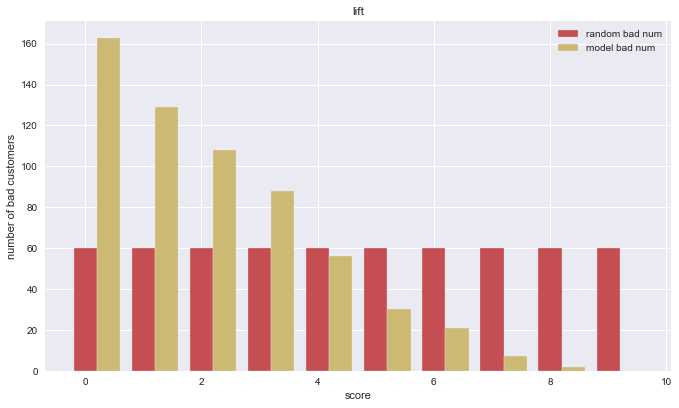

In [131]:
fileName="C:\\Users\\Administrator\\Desktop\\score_proba_train.xlsx"
df=pd.read_excel(fileName)
#score字段排序
df_sort=df.sort_values(by='score')
label=df_sort.label
#总数
rows=df.shape[0]
#提升图分成20份
n=10
#每等分数量
each=rows/n
each=int(round(each,0))
total_badNum=label.sum()
#每个区间坏客户随机数
num_randomBad=int(total_badNum/n)
#均等分的序列
list_average=[label[i:i + each] for i in range(0, len(label), each)]
      
#每个区间坏客户都会放入一个列表
list_badNum_select=[i.sum() for i in list_average]
list_badNum_random=[num_randomBad]*n
                

def Draw_lift(bad,average_badNum,pngName):
    plt.style.use('seaborn')
    plt.figure(figsize=(10,6))
    x =list(range(len(bad)))
    total_width,n = 0.8,2
    width = total_width/n
        
    #fc颜色，x是个数
    plt.bar(x, average_badNum, width=width, label='random bad num',fc = 'r')
    for i in range(len(x)):
        x[i] = x[i] + width
    plt.bar(x, bad, width=width, label='model bad num',fc = 'y')
    plt.legend()
    plt.title(pngName)
    plt.xlabel("score")
    plt.ylabel("number of bad customers")
    plt.show()                 
                     
                     
Draw_lift(list_badNum_select,list_badNum_random,"lift")     

In [165]:
list(range(len(list_badNum_select)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [167]:
list_average

[191    0
 280    1
 288    1
 61     0
 220    0
 269    1
 282    1
 271    1
 287    1
 200    0
 129    0
 281    1
 198    0
 276    1
 92     0
 19     0
 193    0
 270    1
 206    0
 196    0
 279    1
 128    0
 290    1
 272    1
 125    0
 139    0
 192    0
 146    0
 97     0
 Name: label, dtype: int64,
 284    1
 283    1
 285    1
 142    0
 3      0
 31     0
 216    0
 68     0
 36     0
 274    1
 138    0
 48     0
 174    0
 188    0
 170    0
 248    0
 141    0
 58     0
 80     0
 100    0
 130    0
 189    0
 226    0
 89     0
 108    0
 63     0
 171    0
 253    0
 254    0
 Name: label, dtype: int64,
 261    0
 49     0
 101    0
 275    1
 102    0
 249    0
 152    0
 175    0
 243    0
 74     0
 165    0
 252    0
 223    0
 286    1
 241    0
 215    0
 93     0
 9      0
 268    1
 278    1
 13     0
 1      0
 264    0
 47     0
 42     0
 186    0
 267    1
 17     0
 225    0
 Name: label, dtype: int64,
 109    0
 91     0
 53     0
 212    0
 32   

In [166]:
range(0, len(label), each)

range(0, 291, 29)

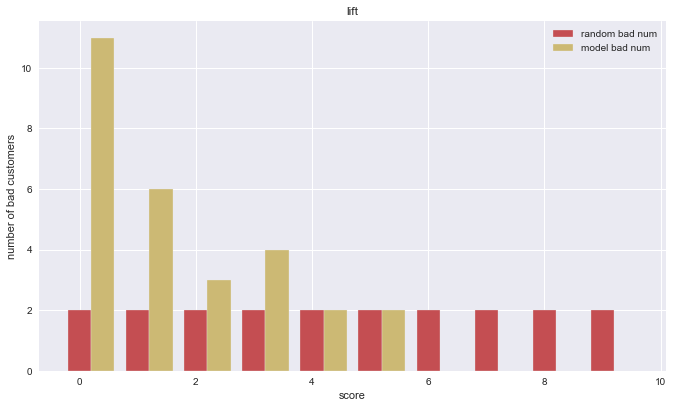

In [169]:
#提升图
fileName="C:\\Users\\Administrator\\Desktop\\score_proba_test.xlsx"
df=pd.read_excel(fileName)
df_sort=df.sort_values(by='score')
label=df_sort.label
rows=df.shape[0]
n=10
each=rows/n
each=int(round(each,0))
total_badNum=label.sum()
#每个区间坏客户随机数
num_randomBad=int(total_badNum/n)

list_average=[label[i:i + each] for i in range(0, len(label), each)]
list_average=list_average[:-1]     

list_badNum_select=[i.sum() for i in list_average]
list_badNum_random=[num_randomBad]*n
                

def Draw_lift(bad,average_badNum,pngName):
    plt.style.use('seaborn')
    plt.figure(figsize=(10,6))
    x =list(range(len(bad)))
    total_width,n = 0.8,2
    width = total_width/n
        
    plt.bar(x, average_badNum, width=width, label='random bad num',fc = 'r')
    for i in range(len(x)):
        x[i] = x[i] + width
    plt.bar(x, bad, width=width, label='model bad num',fc = 'y')
    plt.legend()
    plt.title(pngName)
    plt.xlabel("score")
    plt.ylabel("number of bad customers")
    plt.show()                       
                                          
Draw_lift(list_badNum_select,list_badNum_random,"lift")     

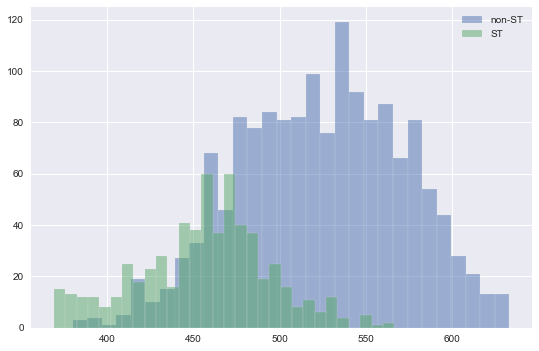

In [113]:
plt.hist(df_result_train[df_result_train['label']==0]['score'],30,alpha=0.5,label='non-ST')
plt.hist(df_result_train[df_result_train['label']==1]['score'],30,alpha=0.5,label='ST')
plt.legend(loc='upper right')
plt.show()